In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [330]:
from scipy.stats import norm, expon

In [146]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv("BDM_cleaned.csv")

In [119]:
# let's get a quick overview of what we're working with

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 1960-01-01 to 2021-01-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inf_mort_rate  245 non-null    float64
 1   birth_tot      245 non-null    int64  
 2   birth_rate     245 non-null    float64
 3   year           245 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.6 KB


In [120]:
import seaborn as sns

In [ ]:
# let's have a look at some plots. I'm going to double most of them
# to compare between matplotlib and seaborn.
# The nicest looking ones will go in the report.

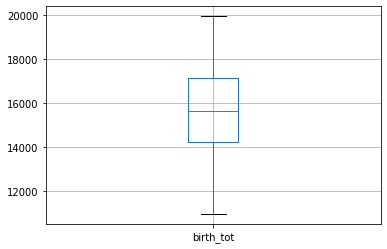

In [140]:
df.boxplot(column="birth_tot");

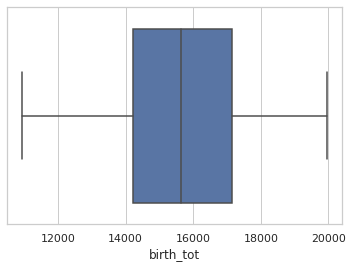

In [199]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df.birth_tot);
plt.savefig("plots/tot_births_box")

In [198]:
# the boxplots give us a good visual indicator of the statistics of our object.
# The function above will give us more concrete figures to work with however.

df.birth_tot.describe()

count      245.00000
mean     15653.17551
std       1958.12091
min      10947.00000
25%      14232.00000
50%      15635.00000
75%      17133.00000
max      19950.00000
Name: birth_tot, dtype: float64

Now let's have a look at the distribution of the data in each attribute.

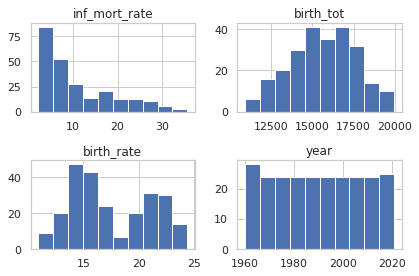

In [151]:
df.hist();
plt.tight_layout()

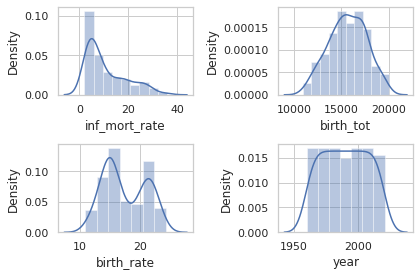

In [200]:
for i, column in enumerate(df.columns, 1):
    plt.subplot(2,2,i)
    sns.distplot(df[column]);
    plt.tight_layout()
plt.savefig("plots/multi_hist", bbox_inches='tight')

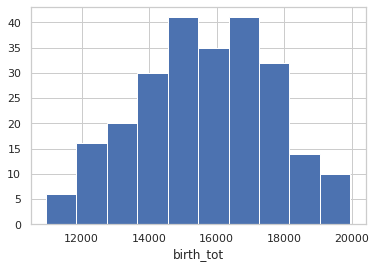

In [203]:
df.hist(column="birth_tot");
plt.title("")
plt.xlabel("birth_tot")
plt.savefig("plots/birth_tot_hist_1")

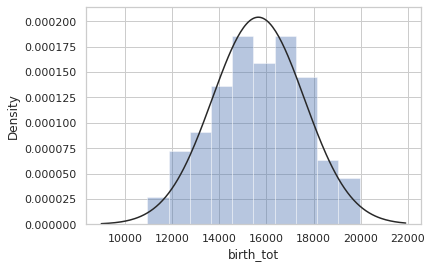

In [214]:
sns.distplot(df.birth_tot, kde=False, fit=norm);
plt.ylabel("Density")
plt.savefig("plots/birth_tot_hist_2", bbox_inches='tight')

In [255]:
df.inf_mort_rate.quantile(0.5)

7.4

In [277]:
rate = np.array([df.inf_mort_rate])

In [286]:
rate.sort()

In [ ]:
# y = poisson.pmf(rate, 11, -10)
# # y_filt = [list[filter(lambda x: , y)] for x in y]
# y_filt = np.nonzero(y)
# x = range(len(y_filt))
# # y_filt = list(y_it)

# sns.distplot(df.inf_mort_rate, kde=False, norm_hist=True);
# # sns.distplot(x, hist=False);
# plt.plot(x, y_filt, 'o');

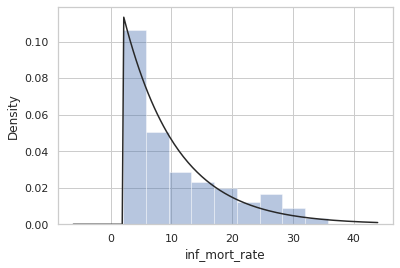

In [332]:
sns.distplot(df.inf_mort_rate, kde=False, fit=expon);
plt.ylabel("Density")
plt.savefig("plots/inf_mort_hist_fit", bbox_inches='tight')

In [128]:
from pandas.plotting import scatter_matrix

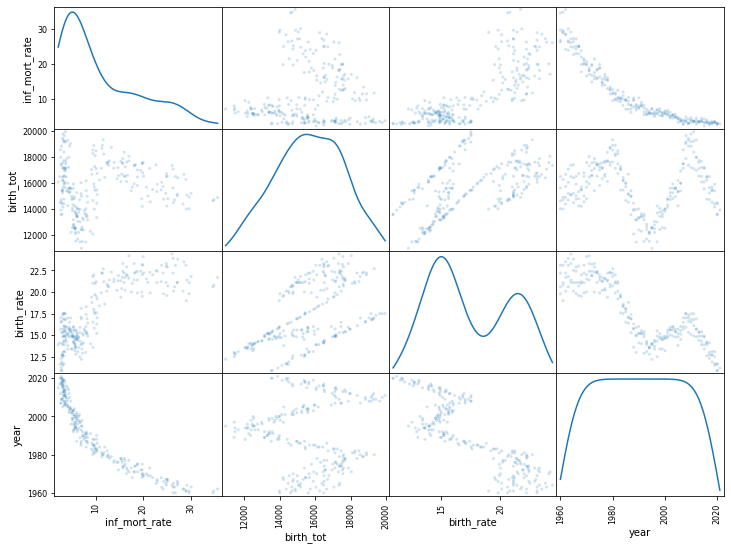

In [131]:
# let's look at the relationships between the columns

scatter_matrix(df, alpha=0.2, figsize=(12, 9), diagonal='kde');

In [30]:
# we need to convert that quarter column into something useful
# we'll convert it to a pandas datetime then set it as the dataframe's index

df.Quarter = pd.to_datetime(df.Quarter)
df.set_index('Quarter', inplace=True)

In [31]:
# for the analysis though we'll covert the datetime to UNIX time and set that as X

X = df.index.strftime("%s").astype("int").values.reshape(-1,1)
y = df.birth_tot

In [110]:
# the X and y data are too far apart in terms of overall magnitude
# so we'll scale them down here to aid the ML algorithm

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

sc_y = StandardScaler()
y_std = sc_y.fit_transform(y.values.reshape(-1,1))
y_std = np.reshape(y_std, 245)

Training score:  0.8221096763984329
Testing score:  0.5219941680375677


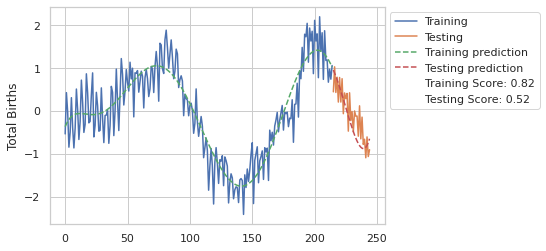

In [239]:
# let's set up the regression algorithm
# it'll be a 7th degree polynomial

regressor = make_pipeline(PolynomialFeatures(7), LinearRegression())

# now let's split the data

X_train, X_test = X_std[:215], X_std[215:]
y_train, y_test = y_std[:215], y_std[215:]

# and perform our regression on the training data

regressor.fit(X_train, y_train)

# now we can make some preictions using the generated model

y_predict = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# we can score our predictions

train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_predict)

print("Training score: ", train_score)
print("Testing score: ", test_score)

# and finally plot our results

plt.plot(range(215), y_train, label="Training")
plt.plot(range(215, len(y_test)+215), y_test, label="Testing")

plt.plot(range(215), y_pred_train, '--', label="Training prediction")
plt.plot(range(215, len(y_test)+215), y_predict, '--', label="Testing prediction")

plt.plot([], [], ' ', label="Training Score: "+str(round(train_score, 2)))
plt.plot([], [], ' ', label="Testing Score: "+str(round(test_score, 2)))

plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel("Total Births")
plt.savefig("plots/bdm_polyfit_7", bbox_inches='tight')

In [12]:
df.tail()

inf_mort_rate  birth_tot  birth_rate  year
Quarter                                               
2020-01-01            2.9      14371        11.7  2020
2020-04-01            2.7      13527        10.9  2020
2020-07-01            2.5      14477        11.6  2020
2020-10-01            2.9      13584        10.9  2020
2021-01-01            2.7      13895        11.2  2021

In [14]:
# let's drop the last row as it's ony one quarter
df.drop(df.tail(1).index, inplace=True)

In [109]:
X = df.index.strftime("%s").astype("int").values.reshape(-1,1)
y = df.birth_tot

X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y.values.reshape(-1,1))
y_std = np.reshape(y_std, 244)

ValueError: cannot reshape array of size 245 into shape (244,)

Training score:  0.8221096763984327
Testing score:  0.48973683774642696


Text(0, 0.5, 'Total Births')

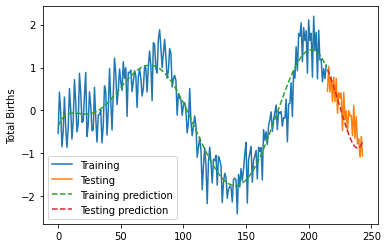

In [17]:
regressor = make_pipeline(PolynomialFeatures(7), LinearRegression())

X_train, X_test = X_std[:215], X_std[215:]
y_train, y_test = y_std[:215], y_std[215:]

regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_predict)

print("Training score: ", train_score)
print("Testing score: ", test_score)

plt.plot(range(215), y_train, label="Training")
plt.plot(range(215, len(y_test)+215), y_test, label="Testing")

plt.plot(range(215), y_pred_train, '--', label="Training prediction")
plt.plot(range(215, len(y_test)+215), y_predict, '--', label="Testing prediction")
plt.legend()
plt.ylabel("Total Births")

This made it worse somehow. Let's get some values to put into our analysis anyway.

In [81]:
# here's our sample of dates for the next 3 years

sample = pd.to_datetime([
    "2022Q1", "2022Q2", "2022Q3", "2022Q4",
    "2023Q1", "2023Q2", "2023Q3", "2023Q4",
    "2024Q1", "2024Q2", "2024Q3", "2024Q4"
])

In [83]:
# let's covert that into a datetime

sample = sample.strftime("%s").astype("int").values.reshape(-1,1)

In [111]:
# now let's scale it

scaled_sample = sc_x.fit_transform(sample)

In [112]:
# and make our predictions with the scaled samples

scaled_result = regressor.predict(scaled_sample)
scaled_result

array([-0.06122366, -0.03382332,  0.54246188,  1.05046801,  0.6307729 ,
       -0.56003568, -1.60986344, -1.52428257, -0.17352891,  1.23918705,
        1.01481801, -0.74516071])

In [116]:
# now let's turn that scaled sample into something useful

sc_y.inverse_transform(scaled_result)

array([15533.53709774, 15587.08067073, 16713.21147643, 17705.91674211,
       16885.78186489, 14558.79821587, 12507.30810009, 12674.5434482 ,
       15314.07907789, 18074.69652373, 17636.2523496 , 14197.04157761])

In [117]:
# double checking using the original data

sc_y.inverse_transform(y_test)

array([16531., 17669., 16502., 17197., 16064., 17183., 16064., 17128.,
       15534., 16480., 16219., 16458., 14740., 16487., 15222., 15635.,
       14709., 15659., 15419., 15428., 14510., 15893., 14389., 15379.,
       14135., 14371., 13527., 14477., 13584., 13895.])

In [118]:
sc_y.inverse_transform(y_train)

array([14614., 16494., 15612., 14010., 14692., 16264., 14895., 13975.,
       14875., 16657., 15719., 14360., 15177., 17064., 16043., 14682.,
       15049., 17351., 16491., 15117., 15185., 16388., 17393., 14477.,
       15004., 16507., 15895., 14737., 14775., 16710., 15324., 14218.,
       15451., 15473., 15676., 14185., 14990., 16779., 16507., 14536.,
       15665., 17567., 16093., 14767., 16456., 18045., 17320., 15931.,
       16576., 17545., 16956., 16566., 17879., 17119., 17605., 15389.,
       17398., 17373., 17498., 16515., 16997., 17470., 17245., 15796.,
       17169., 17550., 17133., 16315., 16667., 17686., 17584., 16499.,
       17671., 18367., 17702., 16104., 18743., 18666., 17578., 17365.,
       18904., 19339., 18538., 17607., 18227., 18895., 18105., 17128.,
       17474., 18475., 18258., 16726., 17087., 17260., 17024., 15444.,
       16424., 16218., 16155., 15440., 15913., 16012., 15683., 14642.,
       15094., 16663., 15164., 14504., 14961., 15406., 14967., 13530.,
      

In [345]:
# one final test of the effect of polynomial degree on score

X_train, X_test = X_std[:215], X_std[215:]
y_train, y_test = y_std[:215], y_std[215:]

score = []

for i in range(10):
    reg = make_pipeline(PolynomialFeatures(i), LinearRegression())
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    test_score = r2_score(y_test, y_predict)
    score.append(test_score)
    print("Testing score: ", test_score)

Testing score:  -0.011261414838875883
Testing score:  0.010616297561617971
Testing score:  -4.983925023708624
Testing score:  -88.35126563218438
Testing score:  -83.71969357939415
Testing score:  -51.90422040274564
Testing score:  -231.23902826604996
Testing score:  0.5219941680375677
Testing score:  -327.38517548809966
Testing score:  -4196.7176696622855


In [346]:
max(score)

0.5219941680375677

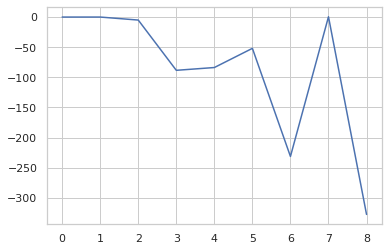

In [352]:
plt.plot(range(9), score[:9])
# plt.ylim(-15)